In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
#import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D, Flatten
import h5py


In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [4]:
#This function takes the two signals and applies noise
def add_noise(signal, noise):
    real_noise_0 = np.random.normal(0,noise, len(signal))
    imag_noise_0 = 1j*np.random.normal(0,noise, len(signal))
    signal_noise = signal + real_noise_0 + imag_noise_0

    return signal_noise

In [7]:
# Collect the signals from one of the recorded locations
with h5py.File("/mnt/nndataset/experiment1/run1x1/CNN_dataset.hdf5", "r") as f:
    # List all groups
    items = f.keys()               #Checks what "folders" are within the file
    #print("Items in base: ", items)
    G1 = f.get('signals')   #Gets the contents of the generated data folder
    #print(G1.keys())               #Checks what datasets are within the folder
    signal_0 = np.array(G1.get('rx_signals')[0,:,:])
    G2 = f.get('labels')
    start = np.array(G2.get('start_index'))
    stop = np.array(G2.get('end_index'))
    
    

In [8]:
# Scale the data so its within the range of -1 to 1
for i in range(len(signal_0)):
    signal_0[i] = signal_0[i] / np.max(signal_0[i])
    

In [9]:
# Put the dataset and labels into the correct format

labels = []
dataset = []
for i in range(len(stop)):
    temp = [start[i], stop[i]]
    labels.append(temp)
    dataset.append(signal_0[i])
    
labels = np.array(labels)
dataset = np.array(dataset)

In [10]:
# Load the model, perform prediction and evaluation on the model
# Prediction is used for getting actual predictions on all the data
# Evaluate gives loss statistics on the model
import warnings
warnings.filterwarnings('ignore')

load_model = keras.models.load_model("Time_CNN_Milestone_2.h5")
validatex = np.array(dataset)
validatey = np.array(labels)


results = load_model.predict(validatex)
history = load_model.evaluate(validatex, validatey)

936/936 [==============================] - 10s 10ms/step - loss: 605.9470 - mean_absolute_error: 14.7525


In [16]:
# Find some error metrics on the individual parameters

# Get the predictions
st_pred = results[:,0]
et_pred = results[:,1]

# Get the correct labels
st_act = validatey[:,0]
et_act = validatey[:,1]

# Calculate the error
st_err = st_pred - st_act
et_err = et_pred - et_act

# Print the MAE
print("Start MAE: ", np.mean(np.abs(st_err)))
print("End MAE: ", np.mean(np.abs(et_err)))

print("")
# Print the RMSE
print("Start RMSE: ",  np.sqrt(np.mean(np.square(st_err))))
print("End RMSE: ",  np.sqrt(np.mean(np.square(et_err))))

Start MAE:  13.16042124890934
End MAE:  16.344636561575964

Start RMSE:  22.57488379302192
End RMSE:  26.500344394299844


Estimated Start:  1147.0822 Actual Start:  1175.0
Estimated End:  1772.8005 Actual End:  1756.0


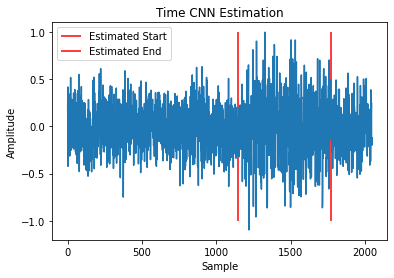

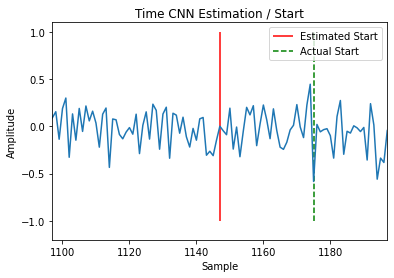

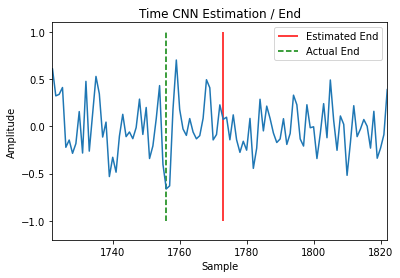

Estimated Start:  1198.6061 Actual Start:  1237.0
Estimated End:  2027.7812 Actual End:  2030.0


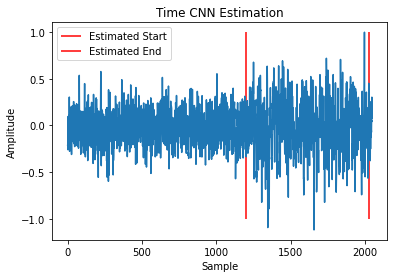

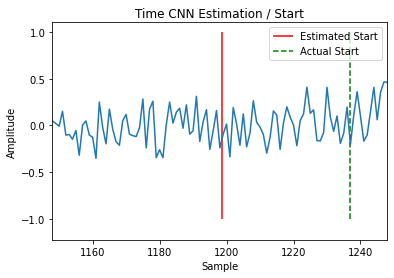

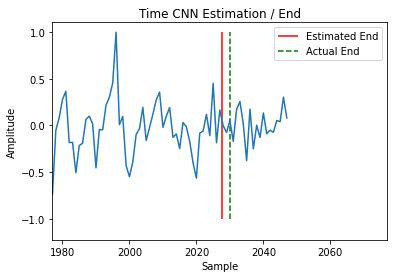

Estimated Start:  605.66034 Actual Start:  602.0
Estimated End:  1701.4805 Actual End:  1688.0


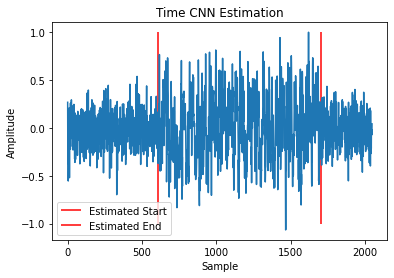

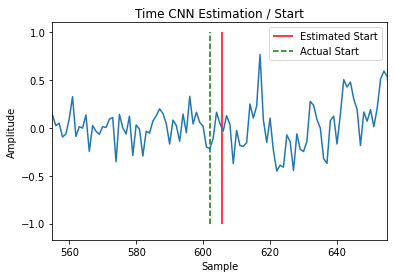

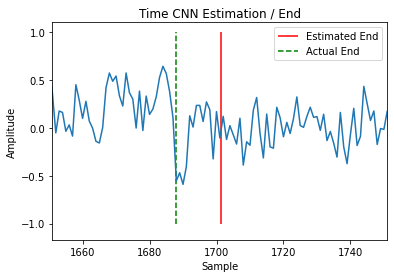

Estimated Start:  1363.6538 Actual Start:  1375.0
Estimated End:  2014.6044 Actual End:  1981.0


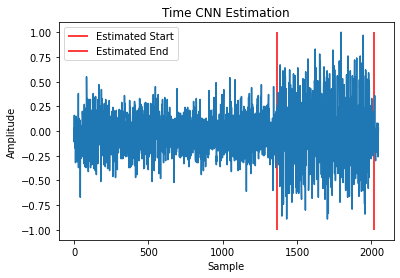

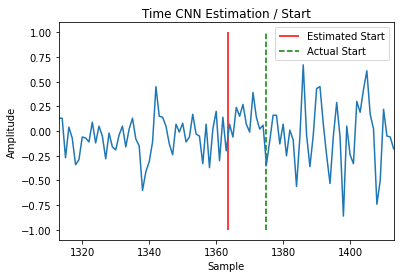

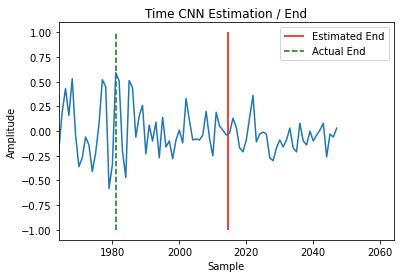

Estimated Start:  1512.52 Actual Start:  1505.0
Estimated End:  2032.9757 Actual End:  2033.0


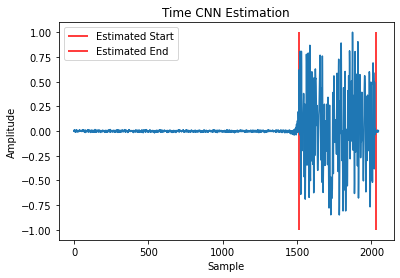

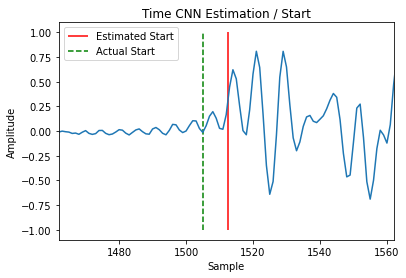

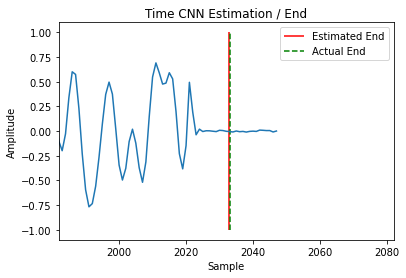

Estimated Start:  1166.7585 Actual Start:  1157.0
Estimated End:  1895.1627 Actual End:  1862.0


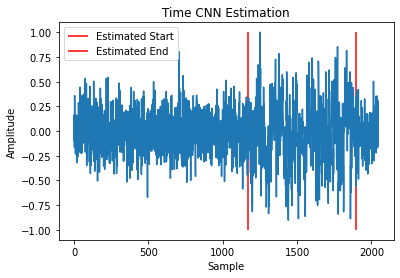

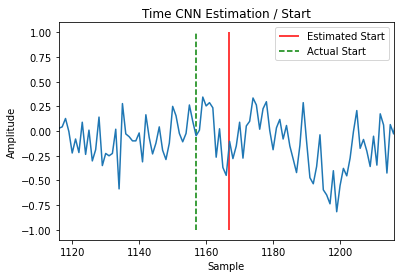

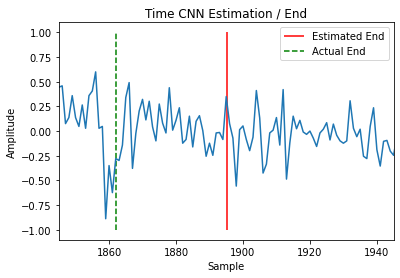

Estimated Start:  1224.3566 Actual Start:  1223.0
Estimated End:  1800.8639 Actual End:  1784.0


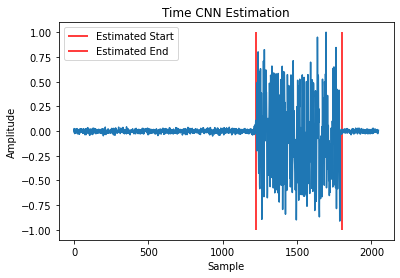

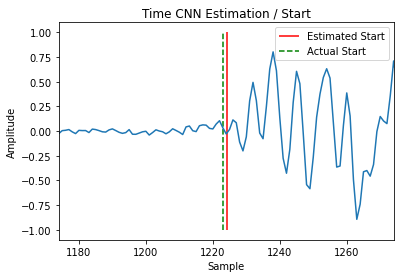

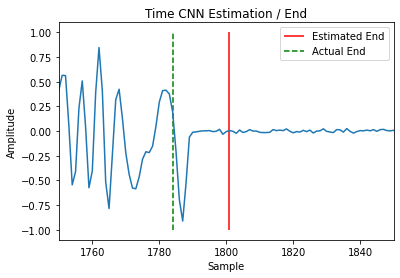

Estimated Start:  324.56552 Actual Start:  333.0
Estimated End:  1311.3253 Actual End:  1299.0


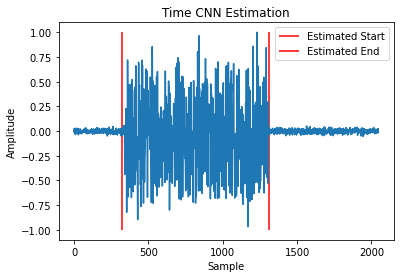

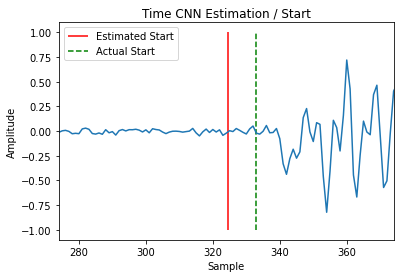

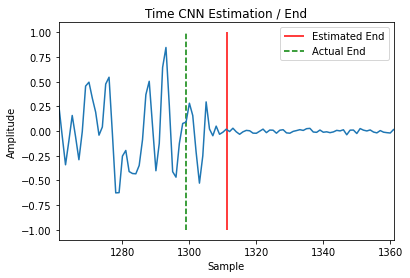

Estimated Start:  569.18286 Actual Start:  573.0
Estimated End:  1994.655 Actual End:  1997.0


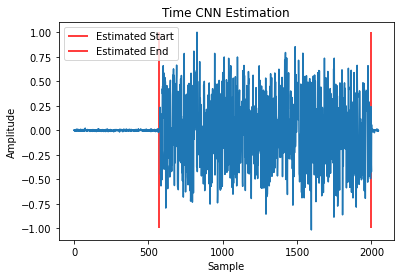

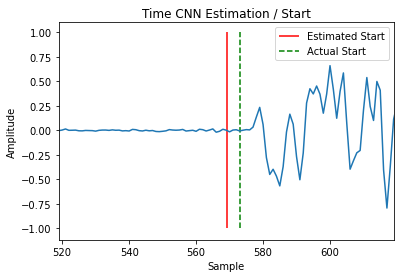

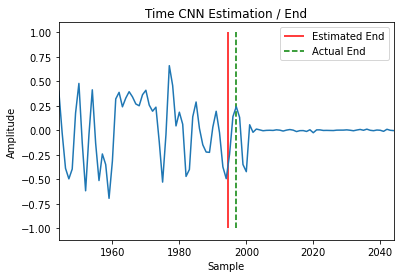

Estimated Start:  1054.063 Actual Start:  1064.0
Estimated End:  1524.5375 Actual End:  1540.0


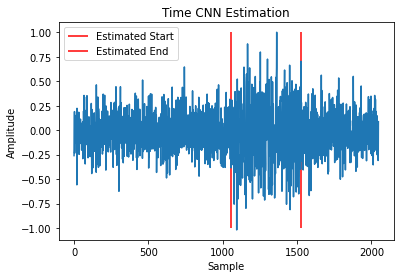

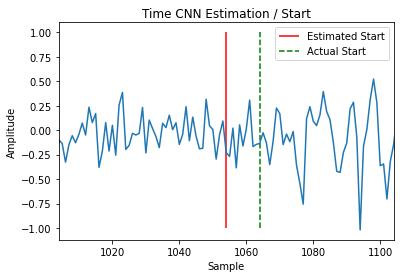

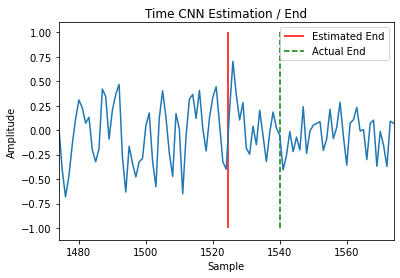

In [17]:
for q in range(10):
    i = np.random.randint(0,len(validatex))
    print("Estimated Start: ", results[i,0], "Actual Start: ", validatey[i,0])
    print("Estimated End: ", results[i,1], "Actual End: ", validatey[i,1])
    signal = validatex[i]
    
   
    plt.plot(range(len(validatex[i])), validatex[i])
    plt.vlines(x=results[i,0], ymin = -1, ymax = 1, colors = 'r', linestyles = 'solid', label = 'Estimated Start')
    plt.vlines(x=results[i,1], ymin = -1, ymax = 1, colors = 'r', linestyles = 'solid', label = 'Estimated End')
    plt.title("Time CNN Estimation")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()
    
    x_min = int(results[i,0]-50)
    x_max = x_min + 100
    
    
    plt.plot(range(len(validatex[i])), validatex[i])
    plt.vlines(x=results[i,0], ymin = -1, ymax = 1, colors = 'r', linestyles = 'solid', label = 'Estimated Start')
    plt.vlines(x=validatey[i,0], ymin = -1, ymax = 1, colors = 'g', linestyles = 'dashed', label = 'Actual Start')
    plt.xlim([x_min, x_max])
    plt.title("Time CNN Estimation / Start")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()
    
    
    x_max = int(results[i,1]+50)
    x_min = x_max - 100
    
    plt.plot(range(len(validatex[i])), validatex[i])
    plt.vlines(x=results[i,1], ymin = -1, ymax = 1, colors = 'r', linestyles = 'solid', label = 'Estimated End')
    plt.vlines(x=validatey[i,1], ymin = -1, ymax = 1, colors = 'g', linestyles = 'dashed', label = 'Actual End')
    plt.title("Time CNN Estimation / End")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.xlim([x_min, x_max])
    plt.legend()
    plt.show()